## Imports
 
We will use the standard data science and machine learning libraries: `numpy`, `pandas`, and `scikit-learn`. We also use `matplotlib` and `seaborn` for visualization. 


In [2]:

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# For ignoring and non-display of warnings
import warnings 
warnings.filterwarnings('ignore')

# For estimations of different statistical models
import statsmodels.api as sm

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1.25)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# For changing categorical to numerical
from sklearn.preprocessing import LabelEncoder

# For performing statistical operations
import scipy.stats as stats


In [3]:
data=pd.read_csv("/content/drive/My Drive/geoiq/singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv")

In [4]:
data.head()

,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266


In [5]:
data.rename(columns={"level_1": "ethnic", "level_2": "age"},inplace=True)
data.tail()

,year,ethnic,age,value
20455,2018,Other Ethnic Groups (Females),65 Years & Over,3386
20456,2018,Other Ethnic Groups (Females),70 Years & Over,2087
20457,2018,Other Ethnic Groups (Females),75 Years & Over,1362
20458,2018,Other Ethnic Groups (Females),80 Years & Over,842
20459,2018,Other Ethnic Groups (Females),85 Years & Over,437


In [6]:
data.age.value_counts()

5  -  9 Years      930
25 - 29 Years      930
45 - 49 Years      930
60 - 64 Years      930
85 Years & Over    930
15 - 19 Years      930
65 Years & Over    930
30 - 34 Years      930
70 Years & Over    930
75 Years & Over    930
70 - 74 Years      930
50 - 54 Years      930
0  -  4 Years      930
80 Years & Over    930
10 - 14 Years      930
55 - 59 Years      930
75 - 79 Years      930
65 - 69 Years      930
20 - 24 Years      930
40 - 44 Years      930
35 - 39 Years      930
80 - 84 Years      930
Name: age, dtype: int64

There was no null values in our data

In [7]:
data.head()

,year,ethnic,age,value
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266


In [8]:
# Replace all occurrences of ? with numpy not a number
data.replace('na',np.nan,inplace=True)

In [9]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_values_table(data)

Your selected dataframe has 4 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
value,2460,12.0


In [11]:
def nans(df):
   return df[df.isnull().any(axis=1)]

In [12]:
x=nans(data)

In [13]:
pd.set_option('display.max_rows', x.shape[0]+1)
print(x)

       year                         ethnic              age value
344    1958                Total Residents    70 - 74 Years   NaN
345    1958                Total Residents    75 - 79 Years   NaN
346    1958                Total Residents    80 - 84 Years   NaN
349    1958                Total Residents  75 Years & Over   NaN
350    1958                Total Residents  80 Years & Over   NaN
351    1958                Total Residents  85 Years & Over   NaN
366    1958           Total Male Residents    70 - 74 Years   NaN
367    1958           Total Male Residents    75 - 79 Years   NaN
368    1958           Total Male Residents    80 - 84 Years   NaN
371    1958           Total Male Residents  75 Years & Over   NaN
372    1958           Total Male Residents  80 Years & Over   NaN
373    1958           Total Male Residents  85 Years & Over   NaN
388    1958         Total Female Residents    70 - 74 Years   NaN
389    1958         Total Female Residents    75 - 79 Years   NaN
390    195

In [14]:
data["value"].fillna(0, inplace=True)

In [15]:
data["value"]=data['value'].astype(int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    20460 non-null  int64 
 1   ethnic  20460 non-null  object
 2   age     20460 non-null  object
 3   value   20460 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 639.5+ KB


In [17]:
data.ethnic.value_counts()

Total Female Indians             1364
Total Female Chinese             1364
Other Ethnic Groups (Males)      1364
Total Residents                  1364
Total Male Malays                1364
Total Male Chinese               1364
Total Female Malays              1364
Total Male Residents             1364
Total Malays                     1364
Total Female Residents           1364
Total Chinese                    1364
Other Ethnic Groups (Females)    1364
Other Ethnic Groups (Total)      1364
Total Indians                    1364
Total Male Indians               1364
Name: ethnic, dtype: int64

**1.Identify the largest Ethnic group in Singapore. Their average population growth over the years and what proportion of the total population do they constitute.**

In [55]:
indexNames = data[(data['ethnic'] == "Total Male Malays")|(data['ethnic'] == "Total Female Malays")|(data['ethnic'] == "Total Male Indians")|(data['ethnic'] == "Total Female Indians")|(data['ethnic'] == "Other Ethnic Groups (Males)")|(data['ethnic'] == "Total Male Chinese")|(data['ethnic'] == "Total Female Chinese")| (data['ethnic'] == "Total Residents") | (data['ethnic'] == "Total Female Residents") |(data['ethnic'] == "Total Male Residents")|(data['ethnic'] == "Other Ethnic Groups (Females)")].index
data.drop(indexNames , inplace=True)

In [56]:
data.ethnic.value_counts()

Total Malays                   1364
Total Indians                  1364
Other Ethnic Groups (Total)    1364
Total Chinese                  1364
Name: ethnic, dtype: int64

In [57]:
import plotly.express as px

fig = px.bar(data, x="age", y="value", title=' largest Ethnic group in Singapore',color="ethnic",barmode='group',)
fig.show()

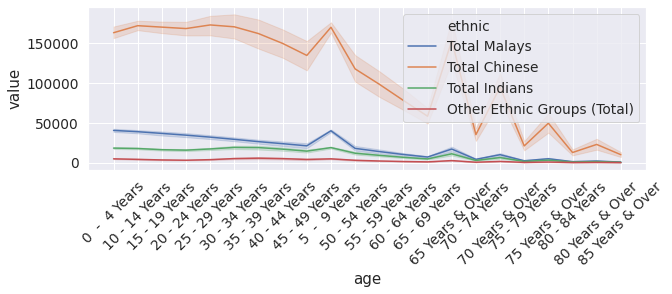

In [58]:
plt.figure(figsize=(10,3))
sns.lineplot(x = "age", y = "value", hue = "ethnic", data = data)
plt.xticks(rotation=45)
plt.show()

**2.Identify the largest age group in Singapore. Their average population growth over the years and what proportion of the total population do they constitute**

In [ ]:
data1 = data.loc[data.ethnic == "Total Male Residents"] 

In [ ]:
data2=data.loc[data.ethnic == "Total Female Residents"]

In [ ]:
data1=pd.concat([data1,data2])
data1.head()

,year,ethnic,age,value
22,1957,Total Male Residents,0 - 4 Years,136712
23,1957,Total Male Residents,5 - 9 Years,112030
24,1957,Total Male Residents,10 - 14 Years,71219
25,1957,Total Male Residents,15 - 19 Years,70137
26,1957,Total Male Residents,20 - 24 Years,61254


In [ ]:
import plotly.express as px

fig = px.bar(data1, x="age", y="value", title=' largest Ethnic group in Singapore',color="ethnic",barmode='group')
fig.show()

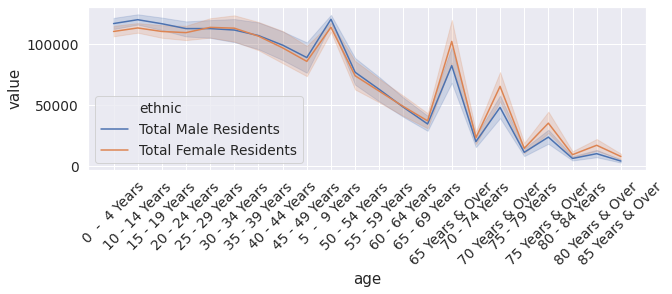

In [ ]:
plt.figure(figsize=(10,3))
sns.lineplot(x = "age", y = "value", hue = "ethnic", data = data1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
data.ethnic.value_counts()

Total Malays                     1364
Total Female Malays              1364
Other Ethnic Groups (Total)      1364
Total Male Residents             1364
Total Male Chinese               1364
Total Chinese                    1364
Other Ethnic Groups (Males)      1364
Total Female Chinese             1364
Total Female Residents           1364
Total Male Indians               1364
Total Indians                    1364
Total Female Indians             1364
Other Ethnic Groups (Females)    1364
Total Residents                  1364
Total Male Malays                1364
Name: ethnic, dtype: int64

 **3.Identify the group (by age, ethnicity and gender) that:
  a. Has shown the highest growth rate
  b. Has shown the lowest growth rate
  c. Has remained the same**



In [ ]:
indexNames = data[(data['ethnic'] == "Other Ethnic Groups (Total)")|(data['ethnic'] == "Total Malays")|(data['ethnic'] == "Total Female Residents")|(data['ethnic'] == "Total Male Residents")|(data['ethnic'] == "Total Indians")|(data['ethnic'] == "Total Residents")|(data['ethnic'] == "Total Chinese")].index
data.drop(indexNames , inplace=True)

In [ ]:
gp=data.groupby(['age','ethnic']).agg({'value': 'sum'})
pct = (gp.groupby(level=0).apply(lambda x:100 * x / float(x.sum())))
pd.set_option('display.max_rows', pct.shape[0]+1)
print(pct)


                                                   value
age             ethnic                                  
0  -  4 Years   Other Ethnic Groups (Females)   1.054388
                Other Ethnic Groups (Males)     1.076839
                Total Female Chinese           34.789925
                Total Female Indians            4.000690
                Total Female Malays             8.726941
                Total Male Chinese             37.142833
                Total Male Indians              4.072944
                Total Male Malays               9.135441
10 - 14 Years   Other Ethnic Groups (Females)   0.907111
                Other Ethnic Groups (Males)     0.888390
                Total Female Chinese           35.701934
                Total Female Indians            3.769838
                Total Female Malays             8.168995
                Total Male Chinese             38.155145
                Total Male Indians              3.875960
                Total Male Mala

In [ ]:
gp=data.groupby(['age','ethnic']).agg({'value': 'sum'})
pct = (gp.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))).max()
pct1 = (gp.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))).min()

In [ ]:
pd.set_option('display.max_rows', pct.shape[0]+1)
print(pct)
print(pct1)

value    60.015775
dtype: float64
value    0.523734
dtype: float64


The highest growth rate in   **Total Female Chinese** with 60.15%
The lowest growth rate in   **Other Ethnic Groups (Males)** with o.53% both are 85 years and over group

**4.Plot a graph for population trends**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text major ticklabel objects>)

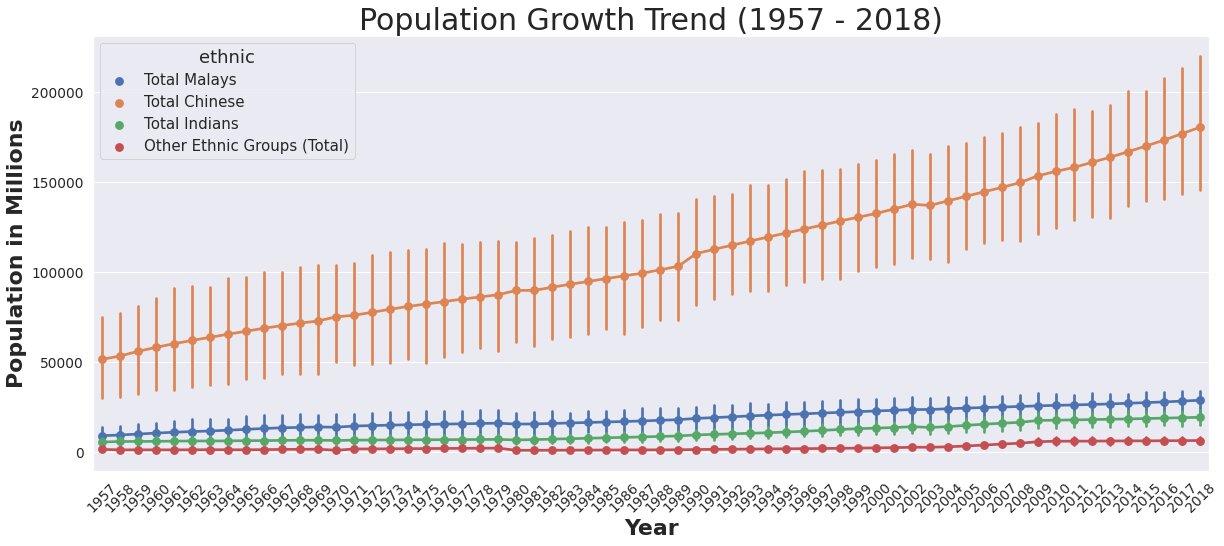

In [61]:
 plt.figure( figsize = (20,8))  
   
 g=sns.pointplot(x='year', y='value', hue='ethnic',  
      data = data)  
 ##  
 g.set_title('Population Growth Trend (1957 - 2018)',size=30)  
 g.set_ylabel('Population in Millions',size=22,weight='bold')  
 g.set_xlabel('Year',size=22,weight='bold')  
 ##  
 plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text  
 plt.setp(g.get_legend().get_title(), fontsize='18')  
 plt.xticks(rotation=45)